Импортируем необходимые модули 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from pathlib import Path

Загрузим сырой ```salaries.csv``` файл с данными о номинальных зарплатах по Строительству, Производству кокса и нефтепродуктов, Образованию за 2000-2023 годы.  
Преобразуем его.

In [9]:
salaries_path = str(Path("../data/raw_data/salaries.csv"))
salaries = pd.read_csv(salaries_path)
salaries_new =  salaries.T
salaries_new = salaries_new.rename_axis('Год').reset_index()
salaries_new

,Год,Строительство,Производство кокса и нефтепродуктов,Образование
0,2000,2639.8,4916.3,1240.2
1,2001,3859.3,7012.4,1833.0
2,2002,4806.9,9625.3,2927.3
3,2003,6176.7,11879.0,3386.6
4,2004,7304.7,13729.3,4203.4
5,2005,9042.8,19397.1,5429.7
6,2006,10869.2,22319.6,6983.3
7,2007,14333.4,28565.0,8778.3
8,2008,18574.0,34912.5,11316.8
9,2009,18122.2,37963.7,13293.6


Загрузим сырой ```inflation.csv``` файл с данными о инфляции за 2000-2023 годы.  
Преобразуем его.

In [20]:
inflation_path = str(Path("../data/raw_data/inflation.csv"))
inflation = pd.read_csv(inflation_path)
inflation_new = inflation.T
inflation_new = inflation_new.rename_axis('Год').reset_index().rename(columns={0: "Инфляция"})
inflation_new

,Год,Инфляция
0,2000,20.20
1,2001,18.58
2,2002,15.06
3,2003,11.99
4,2004,11.74
5,2005,10.91
6,2006,9.00
7,2007,11.87
8,2008,13.28
9,2009,8.80


Добавим в ```inflation_new``` столбец с накопленной инфляцией.
> Для начала давайте поймем, в чем состоит проблема вычисления инфляции за определенный период времени. Индексы потребительских цен (ИПЦ) рассчитываются органами статистики помесячно. Но если за январь рост цен составил 1%, а за февраль 2%, то, очевидно, нельзя просто сложить эти два значения и сказать, что с января по март инфляция составила 3%. Ведь прирост на начало марта считается к уровню начала февраля, а не января. Корректный расчет накопленной инфляции выглядит так:  
> 
> $$ (1,01* 1,02 - 1) * 100 \%  $$
> 
> то есть инфляция за два месяца составила 3,02%.  
> Аналогичным образом считается и накопленная инфляция по годам. Чем длиннее ряд, тем больше будет отклонение от простой арифметической суммы.

In [21]:
inflation_new['Накопленная инфляция'] = float('nan')
inflation_new.loc[0, 'Накопленная инфляция'] = inflation_new.loc[0, 'Инфляция']
for idx, val in enumerate(inflation_new['Инфляция']):
    inflation_new.loc[idx+1, 'Накопленная инфляция'] = (((1+inflation_new.loc[idx, 'Накопленная инфляция']/100)*(1+inflation_new.loc[idx+1, 'Инфляция']/100)-1)*100).round(decimals=2)
    if idx == 22:
      break
inflation_new

,Год,Инфляция,Накопленная инфляция
0,2000,20.20,20.20
1,2001,18.58,42.53
2,2002,15.06,64.00
3,2003,11.99,83.66
4,2004,11.74,105.22
5,2005,10.91,127.61
6,2006,9.00,148.09
7,2007,11.87,177.54
8,2008,13.28,214.40
9,2009,8.80,242.07


Построим смежный график накопленной и простой инфляции за 2000-2023 годы

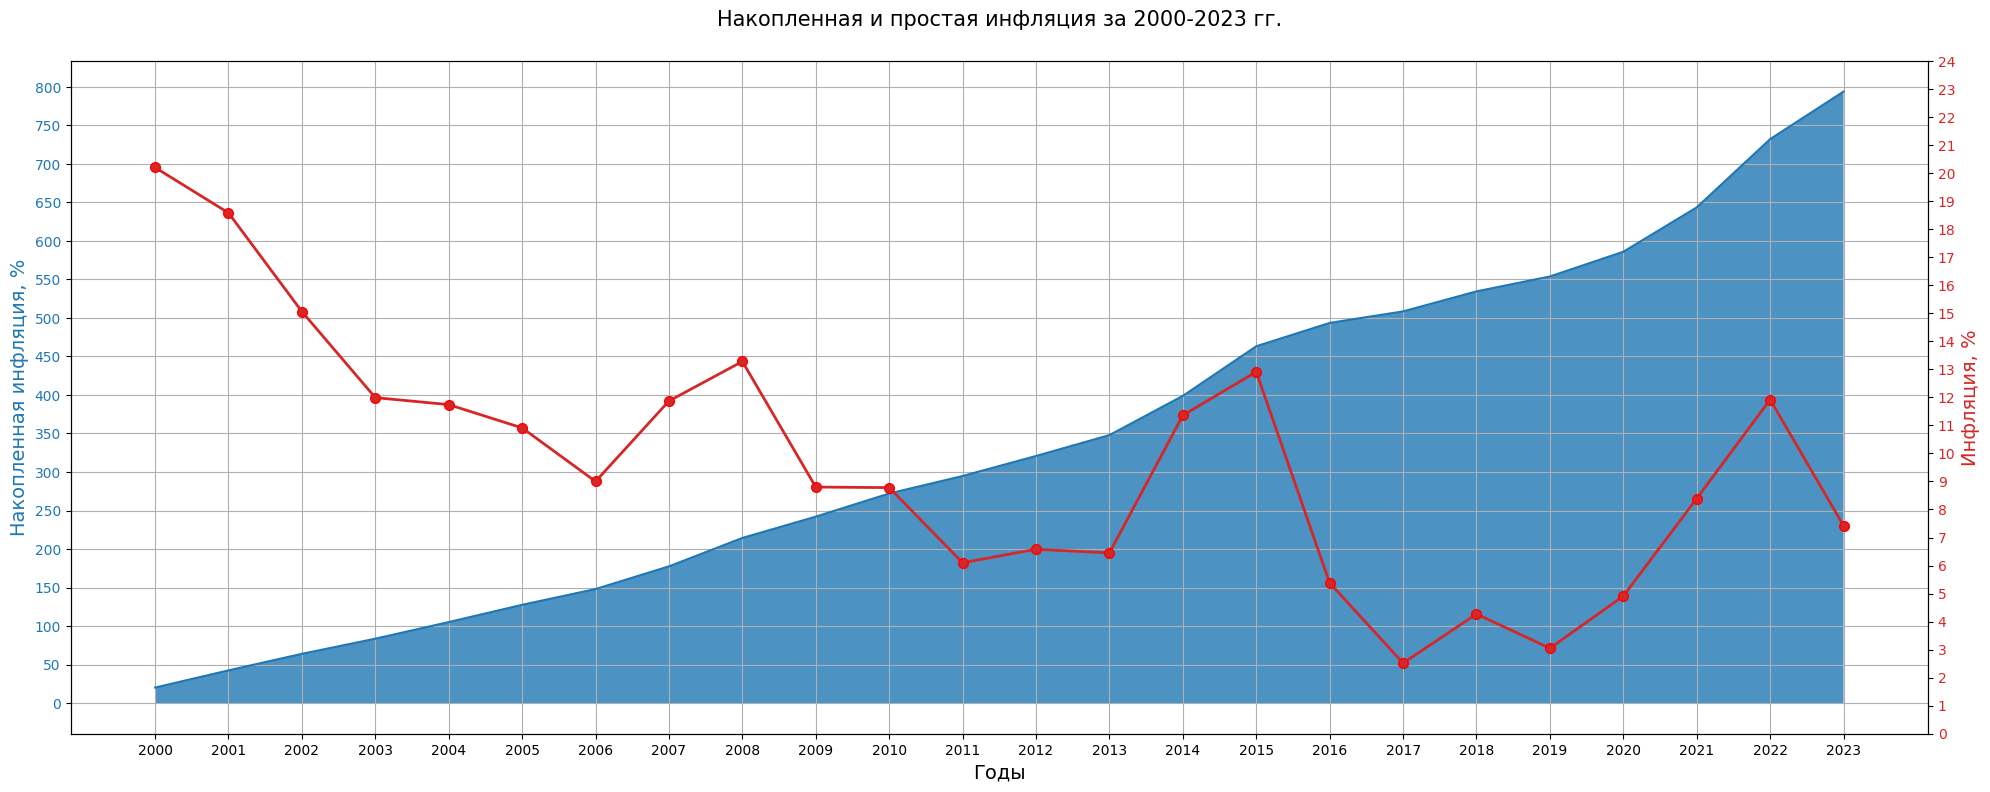

In [22]:
# Построение линейного графика
fig, ax1 = plt.subplots(figsize=(20, 8))

# Записываем данные из необходимых столбцов в переменные
x1 = inflation_new['Год']
y1 = inflation_new['Инфляция']

x2 = inflation_new['Год']
y2 = inflation_new['Накопленная инфляция']

# Добавляем первый график Накопленной инфляции
ax1.plot(x2, y2, color='tab:blue')

# Заголовок графика
plt.title("Накопленная и простая инфляция за 2000-2023 гг.", fontsize=15, y=1.04)

# Подпись каждой из осей первого графика
ax1.set_xlabel("Годы", fontsize=14)
ax1.set_ylabel("Накопленная инфляция, %", fontsize=14, color='tab:blue')

# Настраиваем первый график
ax1.tick_params(axis='y', labelcolor='tab:blue')
ymarks_2 = range(0, 1000, 50)
ax1.set_yticks(ymarks_2)
ax1.fill_between(x2, y2, alpha = 0.8)
plt.grid()

# Добавляем второй график простой инфляции
ax2 = ax1.twinx()
ax2.plot(x1, y1, color='tab:red', linewidth=2, marker='.', markeredgecolor='red', markersize=14.0)

# Настраиваем второй график
ax2.set_ylabel("Инфляция, %", fontsize=14, color='tab:red')
ymarks = range(0, 25)
ax2.set_yticks(ymarks)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Отрегулируем графики между собой
fig.tight_layout()

# Разворачиваем отметки на оси x на 45 градусов
plt.xticks(rotation=45)

# Отображаем весь результат
plt.show()

Инфляция с 2000 по 2023 год составила 793,8% (то есть цены за 23 года выросли немного меньше, чем в 9 раз).

Добавим в таблицу ```inflation_new``` индексы реальной зарплаты и реальную зарплату по Строительству, Производству кокса и нефтепродуктов,	Образованию.  

> Реальная заработная плата - это тот размер материальных благ, продукции или услуг, который может получить человек на сумму номинального заработка. Если в течение определенного времени номинальная зарплата остается неизменной, а уровень инфляции за тот же период вырос, это означает уменьшение реальной зарплаты, что снижает покупательную способность работника, ухудшает его материальное положение. Расчет реальной заработной платы напрямую зависит от экономической ситуации в стране или в регионе, особенно от уровня инфляции, роста потребительских цен.   
> Исследование показателей номинальной и реальной заработной платы тесно взаимосвязаны. Анализ реального дохода невозможно провести без установления номинального заработка. Определение зависимости доходов от экономических факторов производится в динамике. Для этого применяются специальные индексы.  
> 
> Расчет индекса номинального заработка делается по формуле:
> 
> $$ Ином = \frac{НЗтг}{НЗпг}\,* 100\% $$  
>
> где:  
>
> Ином — индекс номинальной зарплаты (%);
> 
> НЗтг — номинальная сумма заработка за текущий год;
> 
> НЗпг — номинальный заработок за предыдущий год.
> 
> Для анализа роста или снижения реальной оплаты труда используют такую формулу:
> 
> $$ Ир = \frac{Ином}{Иц (\%)} $$  
> 
> где:  
>
> Ир — индекс реальной зарплаты;
> 
> Ином — индекс номинального заработка;
> 
> Иц — индекс потребительских цен:
> 
> $$ Иц = инфляция + 100\% $$  
>
> [Источник 1](https://1c-wiseadvice.ru/company/blog/realnaya-i-nominalnaya-zarabotnaya-plata-otlichiya-formula-rascheta/)  
> [Источник 2](https://rosstat.gov.ru/ps/inflation/)


In [37]:
# Добавим индексы реальной зарплаты и реальную зарплату по Строительству, а также номинальную зарплату

inflation_new["Строительство (индекс реальной зарплаты)"] = round((((salaries_new["Строительство"].divide(salaries_new["Строительство"].shift())) * 100) / (inflation_new["Инфляция"].shift() + 100)), 3)
inflation_new["Строительство (индекс реальной зарплаты)"] = inflation_new["Строительство (индекс реальной зарплаты)"].fillna(1.000)
inflation_new["Строительство (реальная зарплата)"] = round(inflation_new["Строительство (индекс реальной зарплаты)"] * salaries_new["Строительство"].shift(), 1)
inflation_new["Строительство (реальная зарплата)"] = inflation_new['Строительство (реальная зарплата)'].fillna(2639.8)
inflation_new["Строительство (номинальная зарплата)"] = salaries_new["Строительство"]

# Добавим индексы реальной зарплаты и реальную зарплату по Производству кокса и нефтепродуктов, а также номинальную зарплату

inflation_new["Производство кокса и нефтепродуктов (индекс реальной зарплаты)"] = round((((salaries_new["Производство кокса и нефтепродуктов"].divide(salaries_new["Производство кокса и нефтепродуктов"].shift())) * 100) / (inflation_new["Инфляция"].shift() + 100)), 3)
inflation_new["Производство кокса и нефтепродуктов (индекс реальной зарплаты)"] = inflation_new["Производство кокса и нефтепродуктов (индекс реальной зарплаты)"].fillna(1.000)
inflation_new["Производство кокса и нефтепродуктов (реальная зарплата)"] = round(inflation_new["Производство кокса и нефтепродуктов (индекс реальной зарплаты)"] * salaries_new["Производство кокса и нефтепродуктов"].shift(), 1)
inflation_new["Производство кокса и нефтепродуктов (реальная зарплата)"] = inflation_new['Производство кокса и нефтепродуктов (реальная зарплата)'].fillna(4916.3)
inflation_new["Производство кокса и нефтепродуктов (номинальная зарплата)"] = salaries_new["Производство кокса и нефтепродуктов"]

# Добавим индексы реальной зарплаты и реальную зарплату по Образованию, а также номинальную зарплату

inflation_new["Образование (индекс реальной зарплаты)"] = round((((salaries_new["Образование"].divide(salaries_new["Образование"].shift())) * 100) / (inflation_new["Инфляция"].shift() + 100)), 3)
inflation_new["Образование (индекс реальной зарплаты)"] = inflation_new["Образование (индекс реальной зарплаты)"].fillna(1.000)
inflation_new["Образование (реальная зарплата)"] = round(inflation_new["Образование (индекс реальной зарплаты)"] * salaries_new["Образование"].shift(), 1)
inflation_new["Образование (реальная зарплата)"] = inflation_new['Образование (реальная зарплата)'].fillna(1240.2)
inflation_new["Образование (номинальная зарплата)"] = salaries_new["Образование"]

inflation_new


,Год,Инфляция,Накопленная инфляция,Строительство (индекс реальной зарплаты),Строительство (реальная зарплата),Строительство (номинальная зарплата),Производство кокса и нефтепродуктов (индекс реальной зарплаты),Производство кокса и нефтепродуктов (реальная зарплата),Производство кокса и нефтепродуктов (номинальная зарплата),Образование (индекс реальной зарплаты),Образование (реальная зарплата),Образование (номинальная зарплата)
0,2000,20.20,20.20,1.000,2639.8,2639.8,1.000,4916.3,4916.3,1.000,1240.2,1240.2
1,2001,18.58,42.53,1.216,3210.0,3859.3,1.187,5835.6,7012.4,1.230,1525.4,1833.0
2,2002,15.06,64.00,1.050,4052.3,4806.9,1.158,8120.4,9625.3,1.347,2469.1,2927.3
3,2003,11.99,83.66,1.117,5369.3,6176.7,1.073,10327.9,11879.0,1.005,2941.9,3386.6
4,2004,11.74,105.22,1.056,6522.6,7304.7,1.032,12259.1,13729.3,1.108,3752.4,4203.4
5,2005,10.91,127.61,1.108,8093.6,9042.8,1.264,17353.8,19397.1,1.156,4859.1,5429.7
6,2006,9.00,148.09,1.084,9802.4,10869.2,1.037,20114.8,22319.6,1.160,6298.5,6983.3
7,2007,11.87,177.54,1.210,13151.7,14333.4,1.174,26203.2,28565.0,1.153,8051.7,8778.3
8,2008,13.28,214.40,1.158,16598.1,18574.0,1.093,31221.5,34912.5,1.152,10112.6,11316.8
9,2009,8.80,242.07,0.861,15992.2,18122.2,0.960,33516.0,37963.7,1.037,11735.5,13293.6


Построим графики номинальной заработной платы по Строительству, Производству кокса и нефтепродуктов, Образованию за 2000-2023 годы. Покажем на графике ежегодный прирост заработной платы в процентах. Сделаем выводы.

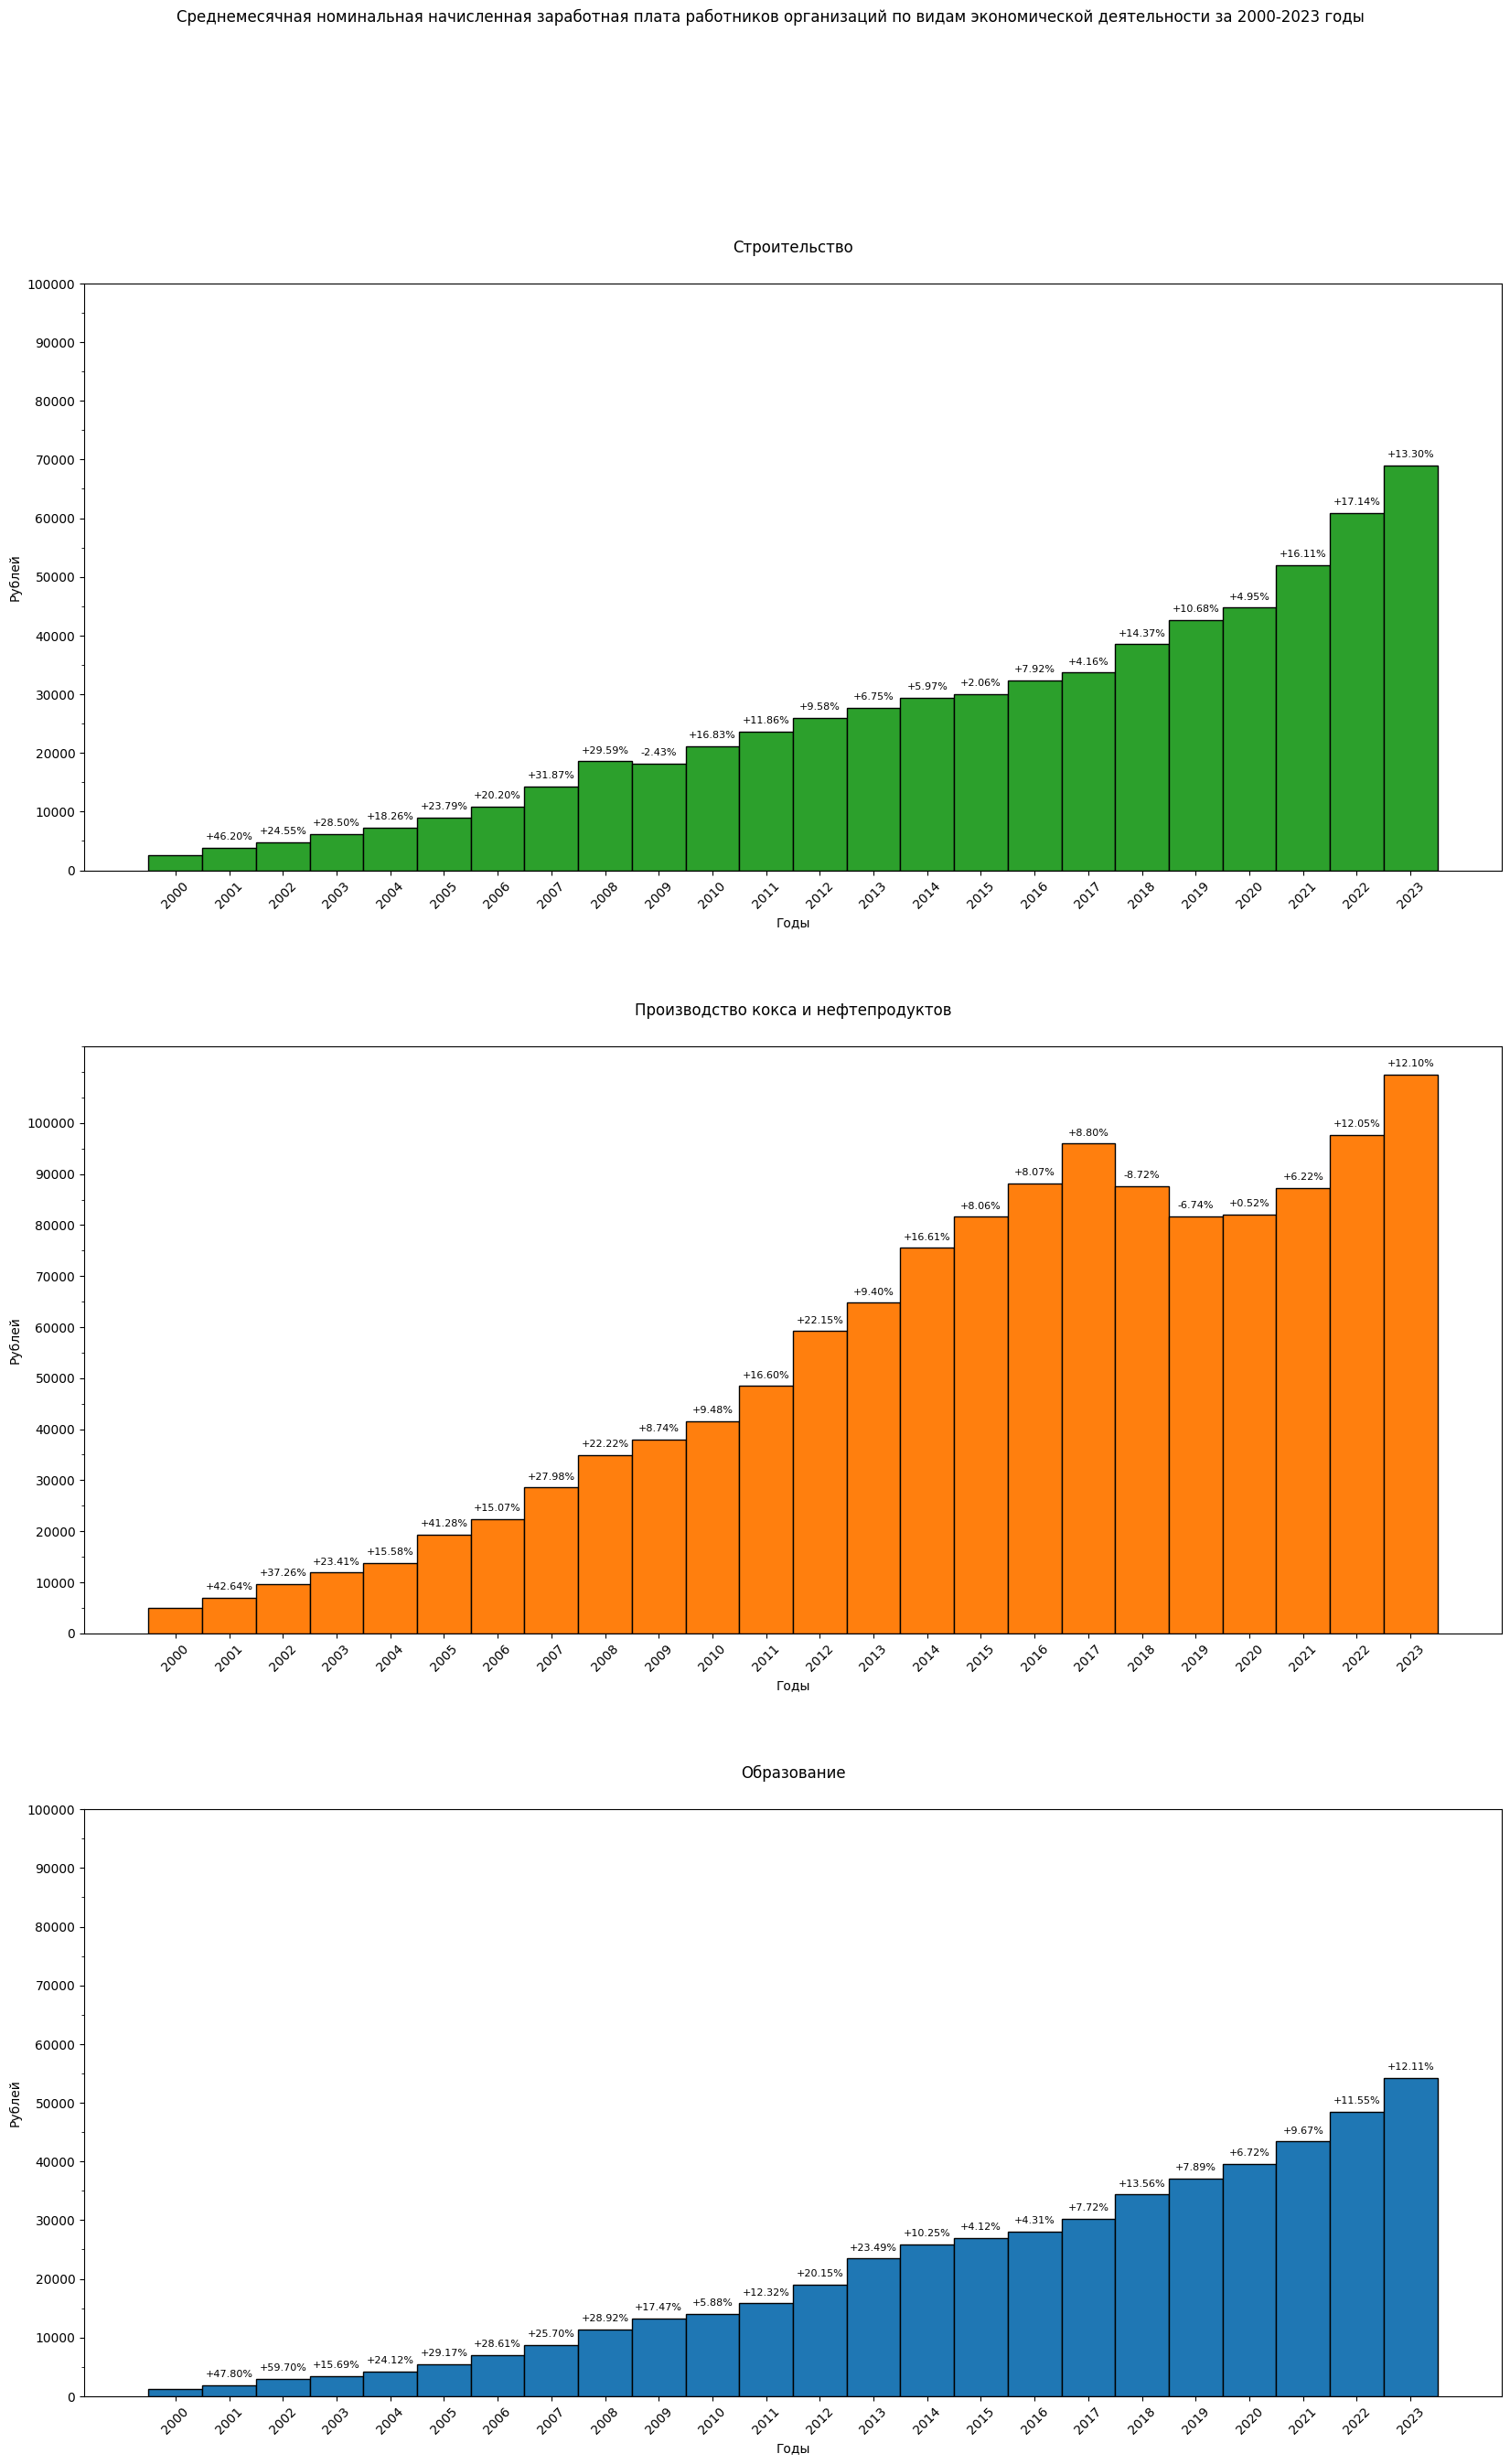

In [28]:
# Строим каркас для подграфиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,30))
plt.subplots_adjust(wspace=0.0, hspace=0.3)

# Записываем данные из необходимых столбцов в переменные для Строительство
x1 = salaries_new['Год']
y1 = salaries_new['Строительство']

# Записываем данные из необходимых столбцов в переменныедля Производство кокса и нефтепродуктов
x2 = salaries_new['Год']
y2 = salaries_new['Производство кокса и нефтепродуктов']

# Записываем данные из необходимых столбцов в переменные для Образование
x3 = salaries_new['Год']
y3 = salaries_new['Образование']

# Строим графики на разных осях
g1 = ax1.bar(x1, y1, color='tab:green', width=1.0 , edgecolor='black')
ax1.bar_label(g1, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y1[:-1], y1[1:])], padding=5, fontsize=8)
# ax1.margins(y=0.1)

g2 = ax2.bar(x2, y2, color='tab:orange', width=1.0 , edgecolor='black')
ax2.bar_label(g2, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y2[:-1], y2[1:])], padding=5, fontsize=8)
# ax2.margins(y=0.1)

g3 = ax3.bar(x3, y3, color='tab:blue', width=1.0 , edgecolor='black')
ax3.bar_label(g3, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y3[:-1], y3[1:])], padding=5, fontsize=8)
# ax3.margins(y=0.5)

# Даем названия каждому набору осей
ax1.set_title('Строительство', y=1.04)
ax2.set_title('Производство кокса и нефтепродуктов', y=1.04)
ax3.set_title('Образование', y=1.04)
plt.suptitle('Среднемесячная номинальная начисленная заработная плата работников организаций по видам экономической деятельности за 2000-2023 годы')

# Подписываем x-оси
ax1.set_xlabel('Годы')
ax2.set_xlabel('Годы')
ax3.set_xlabel('Годы')

# Подписываем y-оси
ax1.set_ylabel('Рублей')
ax2.set_ylabel('Рублей')
ax3.set_ylabel('Рублей')

# Разворачиваем отметки на осях x
ax1.tick_params(labelrotation=45, axis='x')
ax2.tick_params(labelrotation=45, axis='x')
ax3.tick_params(labelrotation=45, axis='x')

# Добавление корректных интервалов по осям y
ymarks = range(0, 110000, 10000)
ax1.set_yticks(ymarks)
ax2.set_yticks(ymarks)
ax3.set_yticks(ymarks)

# Добавление доп тикеров осям y
ax1.yaxis.set_minor_locator(MultipleLocator(5000))
ax2.yaxis.set_minor_locator(MultipleLocator(5000))
ax3.yaxis.set_minor_locator(MultipleLocator(5000))

plt.show()

 #### Выводы
По всем трем видам экономической деятельности номинальные начисленные зарплаты показывают рост год от года, однако есть исключения:  
1) В 2009 году номинальная зарплата в Строительстве показала снижение на 2.43% по сравнению с 2008 годом. Скорее всего сыграла роль [финансово-экономического кризиса в России (2008—2010)](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%BE-%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_(2008%E2%80%942010)#%D0%A1%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%BE).  
2) В 2018 и 2019 годах номинальная зарплата в Производстве кокса и нефтепродуктов показала снижение на 8.72% и 6.74% соответственно.  Скорее всего сыграл роль [Закон о налоговом манёвре в нефтегазовой отрасли (2018)](http://duma.gov.ru/news/27694/). Нововведения предусматривали постепенное снижение в течение шести лет экспортной пошлины на нефть и нефтепродукты с 30% до нуля. Параллельно с этим будет равномерно расти ставка налога на добычу нефти и газового конденсата. Это означает, что налоговая нагрузка, прежде относимая только на экспортную выручку, теперь в такой же степени относится на внутрироссийское потребление и переработку.  

В целом, номинальные начисленные зарплаты в Строительстве росли в пределах 2.06-46.2%, в Производстве кокса и нефтепродуктов в пределах 0.52-42.64%, в Образовании в пределах 4.12-59.7%. По уровню зарплат лидирует Производстве кокса и нефтепродуктов, на втором месте Строительство, самая низкооплачиваемая деятельность из тройки - Образование. 

Построим графики реальной заработной платы по Строительству, Производству кокса и нефтепродуктов, Образованию за 2000-2023 годы. Покажем на графике ежегодный прирост заработной платы в процентах. Сделаем выводы.

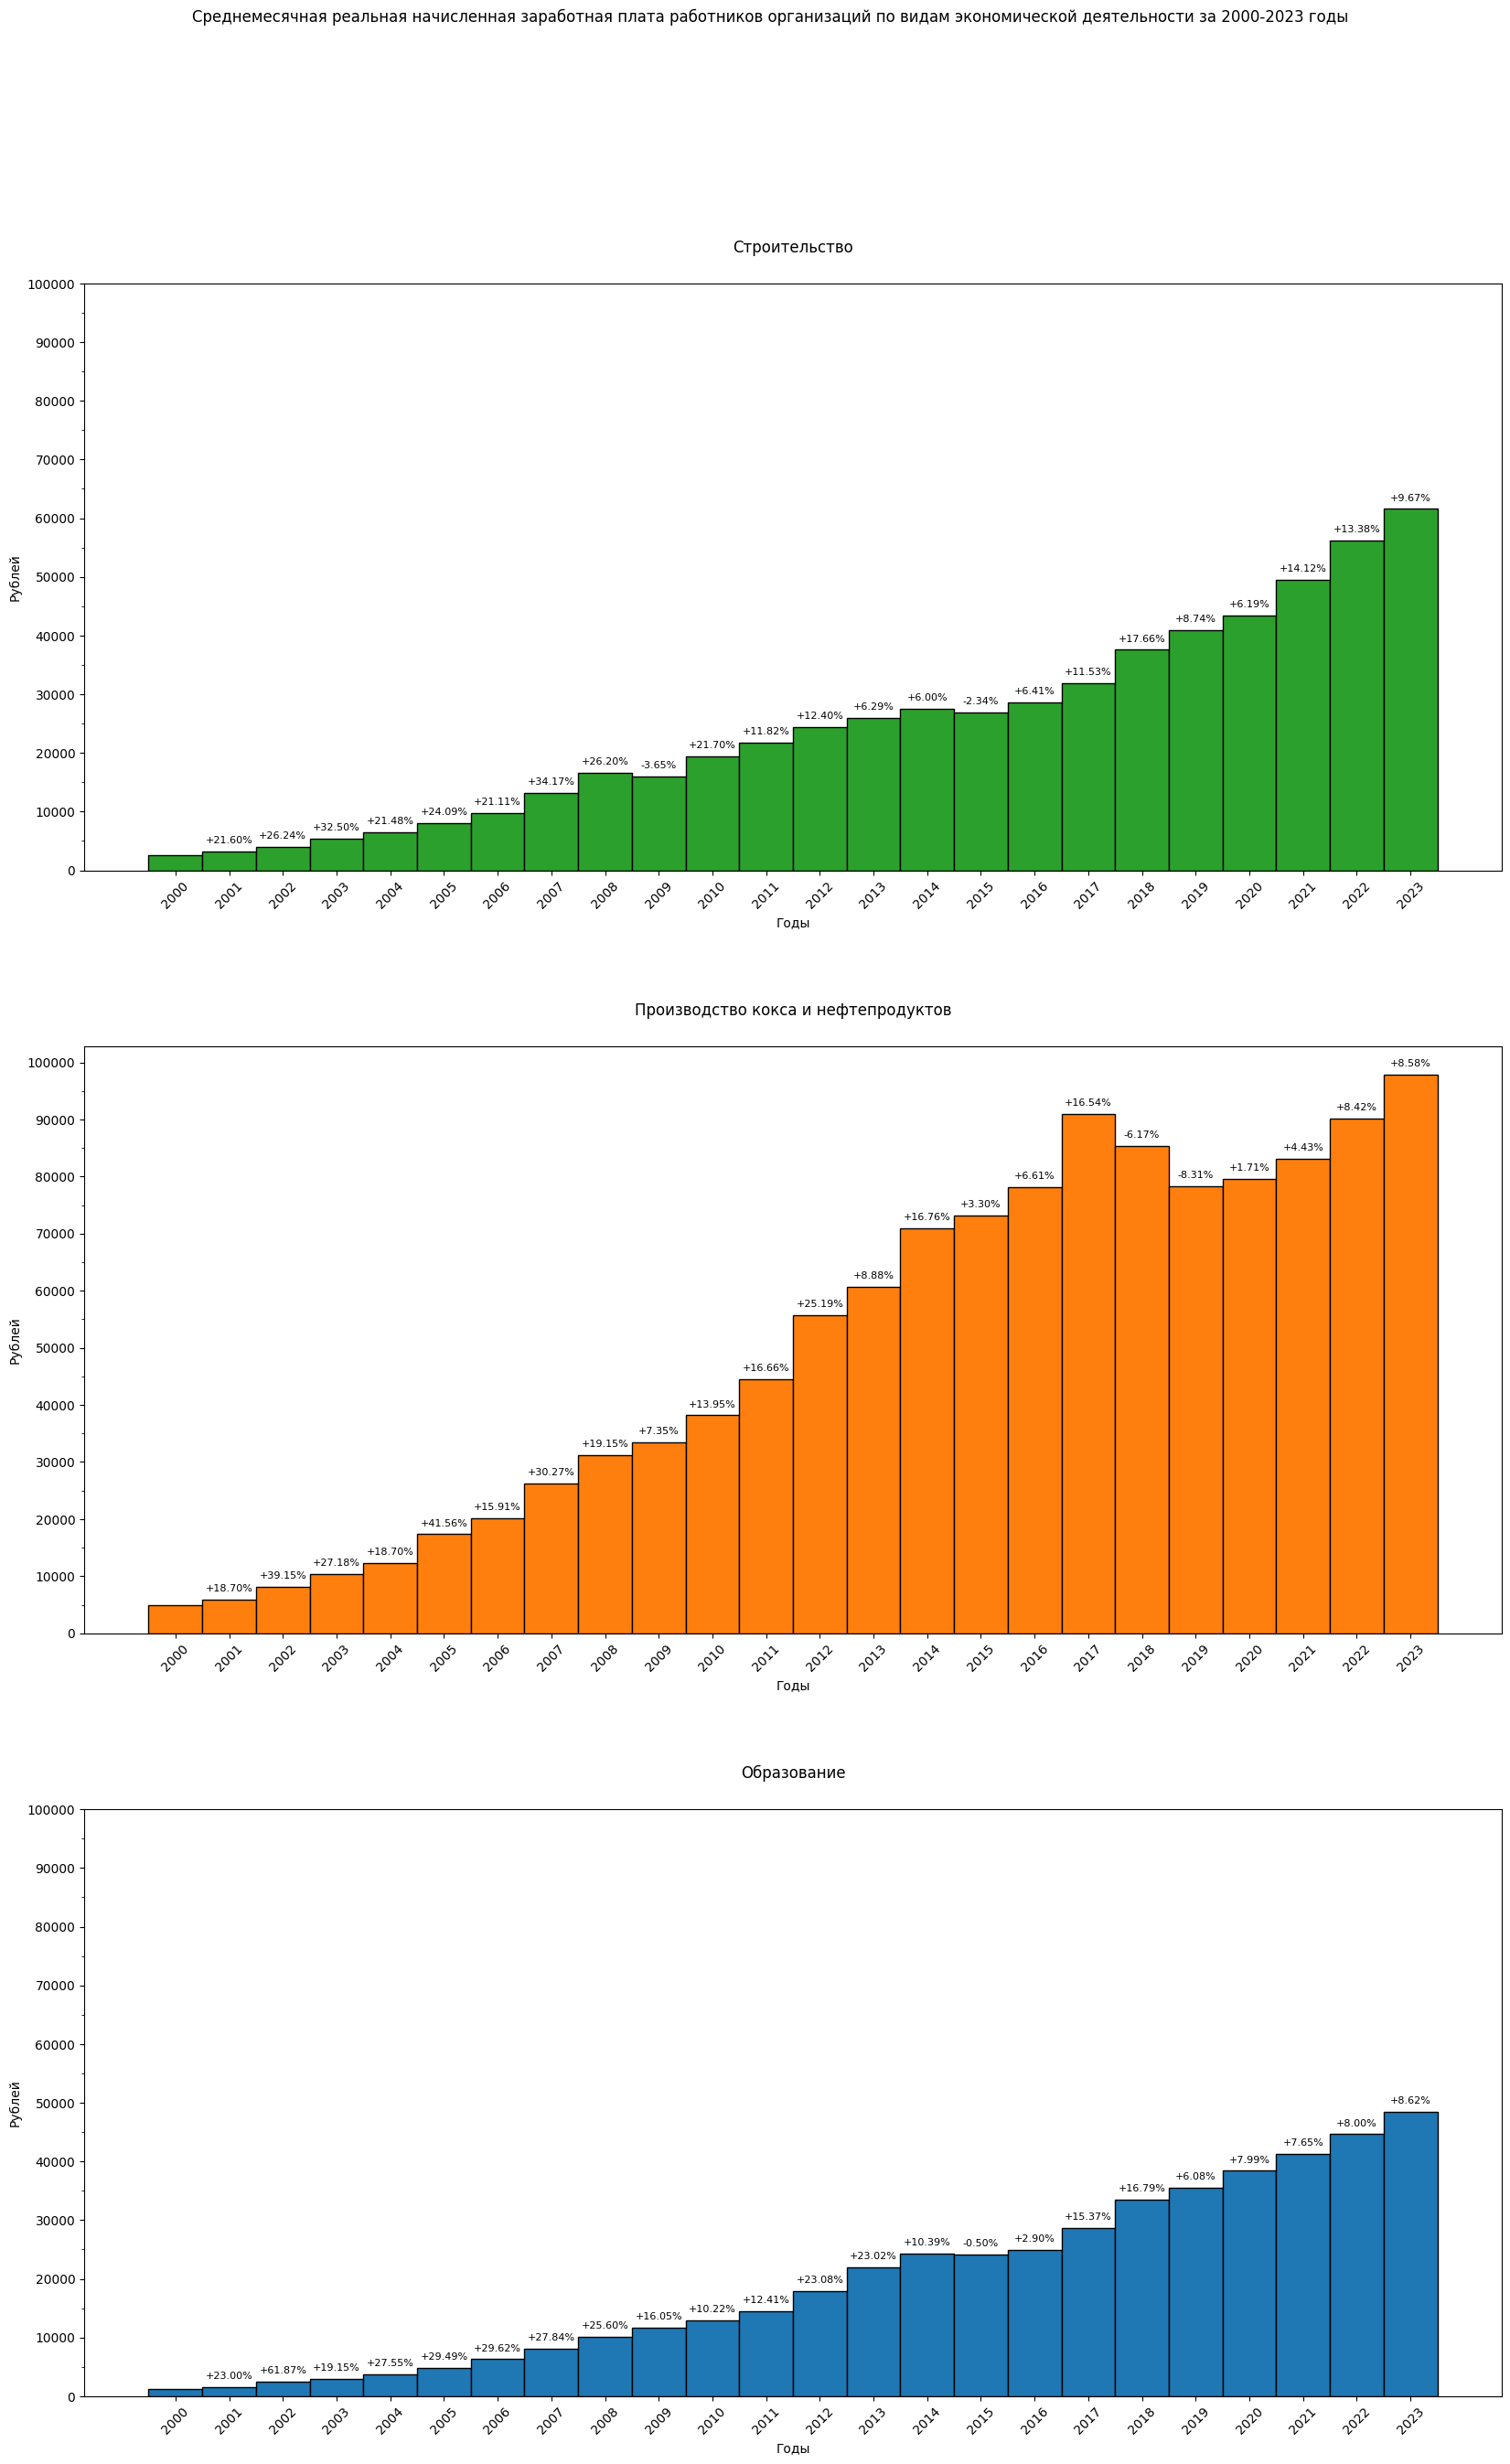

In [27]:
# Строим каркас для подграфиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,30))
plt.subplots_adjust(wspace=0.0, hspace=0.3)

# Записываем данные из необходимых столбцов в переменные  для   Строительство
x1 = inflation_new['Год']
y1 = inflation_new['Строительство (реальная зарплата)']

# Записываем данные из необходимых столбцов в переменные  для Производство кокса и нефтепродуктов
x2 = inflation_new['Год']
y2 = inflation_new['Производство кокса и нефтепродуктов (реальная зарплата)']

# Записываем данные из необходимых столбцов в переменные  для Образование
x3 = inflation_new['Год']
y3 = inflation_new['Образование (реальная зарплата)']

# Строим графики на разных осях
g1 = ax1.bar(x1, y1, color='tab:green', width=1.0 , edgecolor='black')
ax1.bar_label(g1, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y1[:-1], y1[1:])], padding=5, fontsize=8)
# ax1.margins(y=0.1)

g2 = ax2.bar(x2, y2, color='tab:orange', width=1.0 , edgecolor='black')
ax2.bar_label(g2, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y2[:-1], y2[1:])], padding=5, fontsize=8)
# ax2.margins(y=0.1)

g3 = ax3.bar(x3, y3, color='tab:blue', width=1.0 , edgecolor='black')
ax3.bar_label(g3, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y3[:-1], y3[1:])], padding=5, fontsize=8)
# ax3.margins(y=0.5)

# Даем названия каждому набору осей
ax1.set_title('Строительство', y=1.04)
ax2.set_title('Производство кокса и нефтепродуктов', y=1.04)
ax3.set_title('Образование', y=1.04)
plt.suptitle('Среднемесячная реальная начисленная заработная плата работников организаций по видам экономической деятельности за 2000-2023 годы')

# Подписываем x-оси
ax1.set_xlabel('Годы')
ax2.set_xlabel('Годы')
ax3.set_xlabel('Годы')

# Подписываем y-оси
ax1.set_ylabel('Рублей')
ax2.set_ylabel('Рублей')
ax3.set_ylabel('Рублей')

# Разворачиваем отметки на осях x
ax1.tick_params(labelrotation=45, axis='x')
ax2.tick_params(labelrotation=45, axis='x')
ax3.tick_params(labelrotation=45, axis='x')

# Добавление корректных интервалов по осям y
ymarks = range(0, 110000, 10000)
ax1.set_yticks(ymarks)
ax2.set_yticks(ymarks)
ax3.set_yticks(ymarks)

# Добавление доп тикеров осям y
ax1.yaxis.set_minor_locator(MultipleLocator(5000))
ax2.yaxis.set_minor_locator(MultipleLocator(5000))
ax3.yaxis.set_minor_locator(MultipleLocator(5000))

plt.show()

#### Выводы
Ожидаемо с учетом инфляции рост зарплаты выражен слабее на всех трех графиках. Также, помимо снижений заработной платы в 2009 и 2018-2019 годах, увиденных нами на графиках номинальной заработной платы, добавились новые:  
1) для Строительства в 2015 году мы наблюдаем снижение реальной зарплаты по сравнению с 2014 годом на 2.34%.  
2) для Образования в 2015 году мы наблюдаем снижение реальной зарплаты по сравнению с 2014 годом на 0.50%.    

Скорее всего повлиял скачок инфляции 2014-2015 годов и внешнеполитические вызовы. Реальным зарплатам для Производства кокса и нефтепродуктов в 2015 году удалось вырасти, однако этот рост в 3.30% оказался минимальным за наблюдаемый период.  
В целом, реальные начисленные зарплаты в Строительстве росли в пределах 2.34-34.17%, в Производстве кокса и нефтепродуктов в пределах 1.71-41.56%, в Образовании в пределах 2.9-61.87%.